In [1]:
from scipy import stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

/root/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv("data/valu_dec.csv",sep='\t')

In [3]:
data.head()

,valu_dec
0,0.443081
1,0.363532
2,0.363532
3,0.565931
4,0.443081


In [4]:
data.valu_dec.describe()

count    1.307173e+07
mean     4.784497e-01
std      8.156159e-02
min      9.241795e-02
25%      4.430808e-01
50%      4.969448e-01
75%      4.969448e-01
max      8.421213e-01
Name: valu_dec, dtype: float64

In [6]:
val2 =data.valu_new

In [7]:
val2.quantile(0.95)

0.6308065684961539

In [8]:
val2.describe()

count    1.307173e+07
mean     4.784497e-01
std      8.156159e-02
min      9.241795e-02
25%      4.430808e-01
50%      4.969448e-01
75%      4.969448e-01
max      8.421213e-01
Name: valu_dec, dtype: float64

In [83]:
"""
正态化
"""

norm_val,lam = stats.boxcox(val2)

In [84]:
print(lam)

-0.2371615659016521


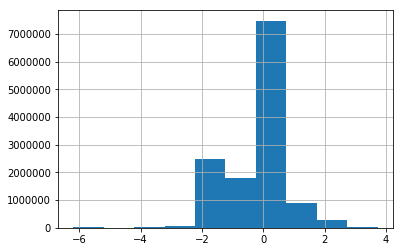

In [86]:
norm_val = pd.Series(norm_val)
norm_val.hist()

## 直接min_max

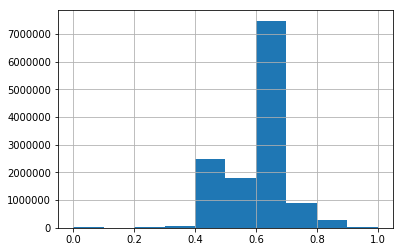

In [87]:
"""
直接min_max正态化后的数据
"""

pd.Series((norm_val-min(norm_val))/(max(norm_val)-min(norm_val))).hist()

In [106]:
pd.Series((norm_val-min(norm_val))/(max(norm_val)-min(norm_val))).describe()

count    1.307171e+07
mean     6.005032e-01
std      8.686696e-02
min      0.000000e+00
25%      5.659872e-01
50%      6.211505e-01
75%      6.211505e-01
max      1.000000e+00
dtype: float64

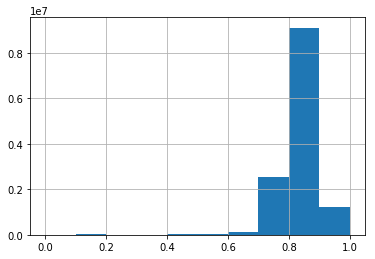

In [107]:
# lambda=-0.2
data.valu_dec.hist()

## z-score结合sigmoid

In [88]:
from sklearn.preprocessing import scale

In [89]:
# z-score
scale_val = scale(norm_val)

In [98]:
pd.Series(scale_val).describe()

count    1.307171e+07
mean     9.135602e-13
std      1.000000e+00
min     -6.912907e+00
25%     -3.973429e-01
50%      2.376884e-01
75%      2.376884e-01
max      4.598950e+00
dtype: float64

In [99]:
min(scale_val)

-6.91290717240719

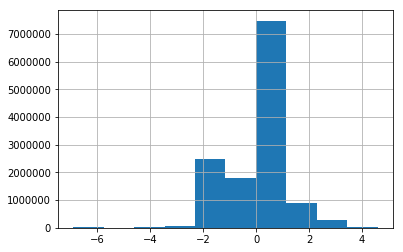

In [97]:
pd.Series(scale_val).hist()

In [100]:
sig_scale_val = 1/(1+np.exp(-scale_val))

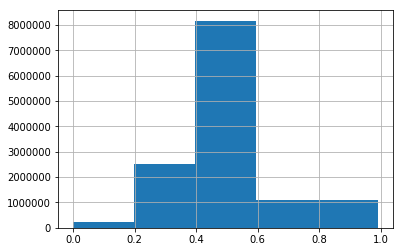

In [102]:
pd.Series(sig_scale_val).hist(bins=5)

## 直接Sigmoid

In [104]:
sig_val = 1/(1+np.exp(-norm_val))

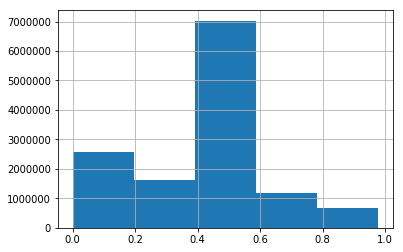

In [105]:
pd.Series(sig_val).hist(bins=5)